In [1]:
# Example of single variable linear regression using Tensorflow.
# Michael Timbes

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def normalize(x):
    """
    Normalizes an input vector.
    """
    mu = np.mean(x)
    st = np.std(x)
    for i in range(len(x)):
        x[i] = ((x[i]-mu)/st)
    return x

In [4]:
alpha = 0.02

# Theta Values
theta_0 = tf.Variable([.01],tf.float32)
theta_1 = tf.Variable([-2.0],tf.float32)

# Input Parameter x
x = tf.placeholder(tf.float32)

# Input Parameter y
y = tf.placeholder(tf.float32)

# Linear Model
lin_mod = theta_1 * x + theta_0

# Define Cost Variable
cost = tf.reduce_sum(tf.square(lin_mod - y))

# Define Optimization Object
optimizationobj = tf.train.GradientDescentOptimizer(alpha)
improve = optimizationobj.minimize(cost)

X-Mean:  62.4545454545
X-Standard Deviation:  8.69026243315
Y-Mean:  150.090909091
Y-Standard Deviation:  12.9926870722


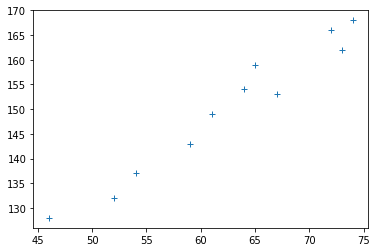

In [5]:
# Training Input Data
data_frame =pd.read_csv('data.csv', sep=',')
data_frame = np.asarray(data_frame)
# Original Data
x_train_data = data_frame[:,1] #X2 = Age
y_train_data = data_frame[:,0] #X1 = Blood Pressure
#print(x_train_data)
#print(y_train_data)
# Copy
x_train_data_norm = np.copy(x_train_data) #X2 = Age
y_train_data_norm = np.copy(y_train_data) #X1 = Blood Pressure
x_mean = np.mean(x_train_data)
x_stde = np.std(x_train_data)
print("X-Mean: ", x_mean)
print("X-Standard Deviation: ", x_stde)
print("Y-Mean: ", np.mean(y_train_data))
print("Y-Standard Deviation: ", np.std(y_train_data))
# Normalize
normalize(x_train_data_norm)
normalize(y_train_data_norm)
plt.plot(x_train_data, y_train_data,"+")
plt.show()

In [6]:
# Training Phase
global_init = tf.global_variables_initializer()
session = tf.Session()
session.run(global_init) # Activate Envir

# Train Loop
for i in range(600):
    session.run(improve,{x:x_train_data_norm,y:y_train_data_norm})
    #print(improve)

In [7]:
#Verification
theta0, theta1, loss_result = session.run([theta_0,theta_1,cost],{x:x_train_data_norm,y:y_train_data_norm})
print("Theta-1 Val:",theta1)
print("Theta-0 Val:",theta0)
print("Total Loss: ", loss_result)

Theta-1 Val: [ 0.83333319]
Theta-0 Val: [-0.16666666]
Total Loss:  1.5


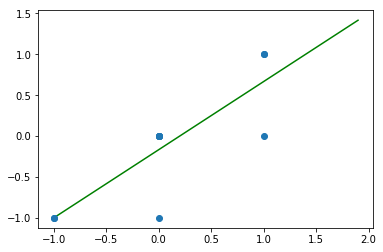

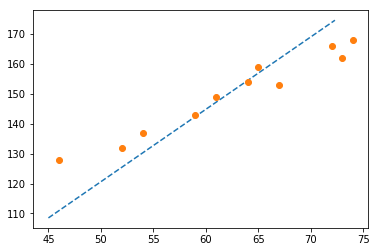

In [8]:
# Graph of Normalized Fit
x_vals_N = np.arange(-1, 2, .1)
y_vals_norm = ((theta1 * x_vals_N) + theta0)
plt.plot(x_vals_N, y_vals_norm,"g",x_train_data_norm, y_train_data_norm,"o")
plt.show()
# Graph of Actual Fit
x_vals = np.arange(45, 75, 2.73)
y_vals_Actnorm = ((theta1 * x_vals) + theta0)
offset = ((theta1 * x_train_data) + theta0)/y_train_data
y_vals = (1/np.mean(offset))*(y_vals_Actnorm) # Adjust for normalization
plt.plot(x_vals, y_vals,"--",x_train_data, y_train_data,"o")
plt.show()